## Lab clustering 

IMPORTANT: 

I did this lab as a training for the song recommender project and the project was not based on this file since my team and I decided to do together while one person did all the "typing"/running code part otherwise the models don't look the same. 
All the steps and files for the song recommender are in its repo. 

Data from: 
- Web scraping from Billboard top 100 songs -> hot songs
- Web scraping from https://www.acclaimedmusic.net/070731/1948-02s.htm - 3000 songs -> not so hot songs 
- Spotify API to gather the songs information and audio features 

1. Import libraries
2. Check, clean, add columns, merge dfs and remove columns 
3. Create the numerical df for the standard scaler, dimensionality reduction and clustering 
4. Standard Scaler 
5. Dimensionality reduction 
6. Clustering 


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.cluster import HDBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification
from scipy.spatial.distance import euclidean
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import colorcet as cc
import time
from dbcv import *

In [2]:
hot_features = pd.read_csv('~/Desktop/data_analytics/Week_6/Day_2/Afternoon/lab-spotify-api/hot_features.csv')

In [3]:
not_hot_features = pd.read_csv('~/Desktop/data_analytics/Week_6/Day_2/Afternoon/lab-spotify-api/not_hot_features.csv')

In [4]:
hot_features.shape

(84, 21)

In [5]:
hot_features.head()

Unnamed: 0                              title        artist  \
0           0  Rockin' Around The Christmas Tree    Brenda Lee   
1           1    All I Want For Christmas Is You  Mariah Carey   
2           2                   Jingle Bell Rock   Bobby Helms   
3           3                     Last Christmas         Wham!   
4           4            A Holly Jolly Christmas     Burl Ives   

                       id  danceability  energy  key  loudness  mode  \
0  2EjXfH91m7f8HiJN1yQg97         0.589   0.472    8    -8.749     1   
1  0bYg9bo50gSsH3LtXe2SQn         0.336   0.627    7    -7.463     1   
2  7vQbuQcyTflfCIOu3Uzzya         0.754   0.424    2    -8.463     1   
3  2FRnf9qhLbvw8fu4IBXx78         0.735   0.478    2   -12.472     1   
4  77khP2fIVhSW23NwxrRluh         0.683   0.375    0   -13.056     1   

   speechiness  ...  instrumentalness  liveness  valence    tempo  \
0       0.0502  ...          0.000000    0.5050    0.898   67.196   
1       0.0384  ...          0.000000    0.0708    0.350  150.273   
2       0.0363  ...          0.000000    0.0652    0.806  119.705   
3       0.0293  ...          0.000002    0.3550    0.947  107.682   
4       0.0303  ...          0.000000    0.0760    0.888  140.467   

             type                                   uri  \
0  audio_features  spotify:track:2EjXfH91m7f8HiJN1yQg97   
1  audio_features  spotify:track:0bYg9bo50gSsH3LtXe2SQn   
2  audio_features  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
3  audio_features  spotify:track:2FRnf9qhLbvw8fu4IBXx78   
4  audio_features  spotify:track:77khP2fIVhSW23NwxrRluh   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2EjXfH91m7f8...   
1  https://api.spotify.com/v1/tracks/0bYg9bo50gSs...   
2  https://api.spotify.com/v1/tracks/7vQbuQcyTflf...   
3  https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...   
4  https://api.spotify.com/v1/tracks/77khP2fIVhSW...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2EjX...      126267   
1  https://api.spotify.com/v1/audio-analysis/0bYg...      241107   
2  https://api.spotify.com/v1/audio-analysis/7vQb...      130973   
3  https://api.spotify.com/v1/audio-analysis/2FRn...      262960   
4  https://api.spotify.com/v1/audio-analysis/77kh...      135533   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4  

[5 rows x 21 columns]

In [6]:
not_hot_features.shape

(2767, 21)

In [7]:
not_hot_features.head()

Unnamed: 0              artist                          title  \
0           0           Bob Dylan           Like a Rolling Stone   
1           1  The Rolling Stones  (I Can't Get No) Satisfaction   
2           2      The Beach Boys                Good Vibrations   
3           3             Nirvana        Smells Like Teen Spirit   
4           4     Aretha Franklin                        Respect   

                       id  danceability  energy  key  loudness  mode  \
0  3AhXZa8sUQht0UEdBJgpGc         0.482   0.721    0    -6.839     1   
1  2PzU4IB8Dr6mxV3lHuaG34         0.723   0.863    2    -7.890     1   
2  5t9KYe0Fhd5cW6UYT4qP8f         0.396   0.473   10    -7.670     0   
3  5ghIJDpPoe3CfHMGu71E6T         0.502   0.912    1    -4.556     1   
4  7s25THrKz86DM225dOYwnr         0.805   0.558    0    -5.226     1   

   speechiness  ...  instrumentalness  liveness  valence    tempo  \
0       0.0321  ...          0.000000    0.1890    0.557   95.263   
1       0.0338  ...          0.031700    0.1280    0.931  136.302   
2       0.0345  ...          0.000124    0.1090    0.385  133.449   
3       0.0564  ...          0.000173    0.1060    0.720  116.761   
4       0.0410  ...          0.000022    0.0546    0.965  114.950   

             type                                   uri  \
0  audio_features  spotify:track:3AhXZa8sUQht0UEdBJgpGc   
1  audio_features  spotify:track:2PzU4IB8Dr6mxV3lHuaG34   
2  audio_features  spotify:track:5t9KYe0Fhd5cW6UYT4qP8f   
3  audio_features  spotify:track:5ghIJDpPoe3CfHMGu71E6T   
4  audio_features  spotify:track:7s25THrKz86DM225dOYwnr   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3AhXZa8sUQht...   
1  https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...   
2  https://api.spotify.com/v1/tracks/5t9KYe0Fhd5c...   
3  https://api.spotify.com/v1/tracks/5ghIJDpPoe3C...   
4  https://api.spotify.com/v1/tracks/7s25THrKz86D...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3AhX...      369600   
1  https://api.spotify.com/v1/audio-analysis/2PzU...      222813   
2  https://api.spotify.com/v1/audio-analysis/5t9K...      219027   
3  https://api.spotify.com/v1/audio-analysis/5ghI...      301920   
4  https://api.spotify.com/v1/audio-analysis/7s25...      147600   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4  

[5 rows x 21 columns]

In [8]:
hot_features['dataset'] = 'Hot'
not_hot_features['dataset'] = 'Not hot'

In [9]:
merged_songs = pd.concat([hot_features, not_hot_features], ignore_index = True)

In [10]:
merged_songs

Unnamed: 0                              title              artist  \
0              0  Rockin' Around The Christmas Tree          Brenda Lee   
1              1    All I Want For Christmas Is You        Mariah Carey   
2              2                   Jingle Bell Rock         Bobby Helms   
3              3                     Last Christmas               Wham!   
4              4            A Holly Jolly Christmas           Burl Ives   
...          ...                                ...                 ...   
2846        2762                  The Facts of Life  Black Box Recorder   
2847        2763        Just Like Tom Thumb's Blues           Bob Dylan   
2848        2764                            On Fire             Sebadoh   
2849        2765                 Long Distance Call             Phoenix   
2850        2766                            My Girl        Otis Redding   

                          id  danceability  energy  key  loudness  mode  \
0     2EjXfH91m7f8HiJN1yQg97         0.589   0.472    8    -8.749     1   
1     0bYg9bo50gSsH3LtXe2SQn         0.336   0.627    7    -7.463     1   
2     7vQbuQcyTflfCIOu3Uzzya         0.754   0.424    2    -8.463     1   
3     2FRnf9qhLbvw8fu4IBXx78         0.735   0.478    2   -12.472     1   
4     77khP2fIVhSW23NwxrRluh         0.683   0.375    0   -13.056     1   
...                      ...           ...     ...  ...       ...   ...   
2846  4eappNAqv5JsqWN1LJqpfY         0.619   0.508    8   -10.014     1   
2847  0V1771LhL3tG36pb55EZAH         0.497   0.511    7    -8.318     1   
2848  091SOmej015R3W0pUkc05v         0.489   0.588    7    -6.601     1   
2849  7dGubYmPavaI9YNansq9TW         0.752   0.496    0    -5.498     1   
2850  5zQyqgNXKzhifkivumzxDS         0.740   0.322    0    -9.260     1   

      speechiness  ...  liveness  valence    tempo            type  \
0          0.0502  ...    0.5050    0.898   67.196  audio_features   
1          0.0384  ...    0.0708    0.350  150.273  audio_features   
2          0.0363  ...    0.0652    0.806  119.705  audio_features   
3          0.0293  ...    0.3550    0.947  107.682  audio_features   
4          0.0303  ...    0.0760    0.888  140.467  audio_features   
...           ...  ...       ...      ...      ...             ...   
2846       0.0332  ...    0.0840    0.235  139.012  audio_features   
2847       0.0271  ...    0.2620    0.591   99.500  audio_features   
2848       0.0279  ...    0.3160    0.218  106.905  audio_features   
2849       0.0446  ...    0.0729    0.677  104.949  audio_features   
2850       0.0399  ...    0.1700    0.629  102.889  audio_features   

                                       uri  \
0     spotify:track:2EjXfH91m7f8HiJN1yQg97   
1     spotify:track:0bYg9bo50gSsH3LtXe2SQn   
2     spotify:track:7vQbuQcyTflfCIOu3Uzzya   
3     spotify:track:2FRnf9qhLbvw8fu4IBXx78   
4     spotify:track:77khP2fIVhSW23NwxrRluh   
...                                    ...   
2846  spotify:track:4eappNAqv5JsqWN1LJqpfY   
2847  spotify:track:0V1771LhL3tG36pb55EZAH   
2848  spotify:track:091SOmej015R3W0pUkc05v   
2849  spotify:track:7dGubYmPavaI9YNansq9TW   
2850  spotify:track:5zQyqgNXKzhifkivumzxDS   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/2EjXfH91m7f8...   
1     https://api.spotify.com/v1/tracks/0bYg9bo50gSs...   
2     https://api.spotify.com/v1/tracks/7vQbuQcyTflf...   
3     https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...   
4     https://api.spotify.com/v1/tracks/77khP2fIVhSW...   
...                                                 ...   
2846  https://api.spotify.com/v1/tracks/4eappNAqv5Js...   
2847  https://api.spotify.com/v1/tracks/0V1771LhL3tG...   
2848  https://api.spotify.com/v1/tracks/091SOmej015R...   
2849  https://api.spotify.com/v1/tracks/7dGubYmPavaI...   
2850  https://api.spotify.com/v1/tracks/5zQyqgNXKzhi...   

                                           analysis_url duration_ms  \
0     https://api.spotify.com/

In [11]:
merged_songs = merged_songs.drop(columns = 'Unnamed: 0')

In [12]:
merged_songs.head()

title        artist                      id  \
0  Rockin' Around The Christmas Tree    Brenda Lee  2EjXfH91m7f8HiJN1yQg97   
1    All I Want For Christmas Is You  Mariah Carey  0bYg9bo50gSsH3LtXe2SQn   
2                   Jingle Bell Rock   Bobby Helms  7vQbuQcyTflfCIOu3Uzzya   
3                     Last Christmas         Wham!  2FRnf9qhLbvw8fu4IBXx78   
4            A Holly Jolly Christmas     Burl Ives  77khP2fIVhSW23NwxrRluh   

   danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
0         0.589   0.472    8    -8.749     1       0.0502         0.614  ...   
1         0.336   0.627    7    -7.463     1       0.0384         0.164  ...   
2         0.754   0.424    2    -8.463     1       0.0363         0.643  ...   
3         0.735   0.478    2   -12.472     1       0.0293         0.189  ...   
4         0.683   0.375    0   -13.056     1       0.0303         0.579  ...   

   liveness  valence    tempo            type  \
0    0.5050    0.898   67.196  audio_features   
1    0.0708    0.350  150.273  audio_features   
2    0.0652    0.806  119.705  audio_features   
3    0.3550    0.947  107.682  audio_features   
4    0.0760    0.888  140.467  audio_features   

                                    uri  \
0  spotify:track:2EjXfH91m7f8HiJN1yQg97   
1  spotify:track:0bYg9bo50gSsH3LtXe2SQn   
2  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
3  spotify:track:2FRnf9qhLbvw8fu4IBXx78   
4  spotify:track:77khP2fIVhSW23NwxrRluh   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2EjXfH91m7f8...   
1  https://api.spotify.com/v1/tracks/0bYg9bo50gSs...   
2  https://api.spotify.com/v1/tracks/7vQbuQcyTflf...   
3  https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...   
4  https://api.spotify.com/v1/tracks/77khP2fIVhSW...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2EjX...      126267   
1  https://api.spotify.com/v1/audio-analysis/0bYg...      241107   
2  https://api.spotify.com/v1/audio-analysis/7vQb...      130973   
3  https://api.spotify.com/v1/audio-analysis/2FRn...      262960   
4  https://api.spotify.com/v1/audio-analysis/77kh...      135533   

   time_signature  dataset  
0               4      Hot  
1               4      Hot  
2               4      Hot  
3               4      Hot  
4               4      Hot  

[5 rows x 21 columns]

In [13]:
merged_songs.to_csv('merged_songs.csv')

In [14]:
selected = ['artist', 'title', 'id', 'type', 'uri', 'track_href', 'analysis_url', 'dataset']
num_cluster = merged_songs.drop(columns = selected)

In [15]:
num_cluster

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.589   0.472    8    -8.749     1       0.0502       0.61400   
1            0.336   0.627    7    -7.463     1       0.0384       0.16400   
2            0.754   0.424    2    -8.463     1       0.0363       0.64300   
3            0.735   0.478    2   -12.472     1       0.0293       0.18900   
4            0.683   0.375    0   -13.056     1       0.0303       0.57900   
...            ...     ...  ...       ...   ...          ...           ...   
2846         0.619   0.508    8   -10.014     1       0.0332       0.00151   
2847         0.497   0.511    7    -8.318     1       0.0271       0.70200   
2848         0.489   0.588    7    -6.601     1       0.0279       0.02690   
2849         0.752   0.496    0    -5.498     1       0.0446       0.02020   
2850         0.740   0.322    0    -9.260     1       0.0399       0.55100   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.000000    0.5050    0.898   67.196       126267   
1             0.000000    0.0708    0.350  150.273       241107   
2             0.000000    0.0652    0.806  119.705       130973   
3             0.000002    0.3550    0.947  107.682       262960   
4             0.000000    0.0760    0.888  140.467       135533   
...                ...       ...      ...      ...          ...   
2846          0.000013    0.0840    0.235  139.012       191333   
2847          0.000000    0.2620    0.591   99.500       327560   
2848          0.021300    0.3160    0.218  106.905       216067   
2849          0.000013    0.0729    0.677  104.949       186160   
2850          0.000763    0.1700    0.629  102.889       175853   

      time_signature  
0                  4  
1                  4  
2                  4  
3                  4  
4                  4  
...              ...  
2846               4  
2847               4  
2848               4  
2849               4  
2850               4  

[2851 rows x 13 columns]

In [16]:
scaler = StandardScaler()
scaler.fit(num_cluster)
num_scaled = scaler.transform(num_cluster)

filename = "song_scaler.pickle" 
with open(filename, "wb") as file:
        pickle.dump(scaler,file)

num_scaled_df = pd.DataFrame(num_scaled, columns = num_cluster.columns)

num_scaled_df

danceability    energy       key  loudness      mode  speechiness  \
0         0.084983 -0.662365  0.766668  0.158499  0.602878    -0.271219   
1        -1.413018  0.006921  0.481245  0.493502  0.602878    -0.429938   
2         1.061940 -0.869628 -0.945871  0.233002  0.602878    -0.458185   
3         0.949442 -0.636457 -0.945871 -0.811343  0.602878    -0.552341   
4         0.641552 -1.081209 -1.516717 -0.963476  0.602878    -0.538890   
...            ...       ...       ...       ...       ...          ...   
2846      0.262611 -0.506918  0.766668 -0.171034  0.602878    -0.499882   
2847     -0.459745 -0.493964  0.481245  0.270774  0.602878    -0.581932   
2848     -0.507112 -0.161480  0.481245  0.718053  0.602878    -0.571172   
2849      1.050098 -0.558734 -1.516717  1.005385  0.602878    -0.346543   
2850      0.979046 -1.310062 -1.516717  0.025383  0.602878    -0.409762   

      acousticness  instrumentalness  liveness   valence     tempo  \
0         0.976494         -0.430733  1.733621  1.176937 -1.981037   
1        -0.436521         -0.430733 -0.732653 -1.096174  1.049520   
2         1.067555         -0.430733 -0.764461  0.795320 -0.065566   
3        -0.358020         -0.430722  0.881615  1.380190 -0.504152   
4         0.866593         -0.430733 -0.703117  1.135457  0.691808   
...            ...               ...       ...       ...       ...   
2846     -0.946745         -0.430680 -0.657676 -1.573196  0.638732   
2847      1.252817         -0.430733  0.353371 -0.096503 -0.802623   
2848     -0.867020         -0.341595  0.660093 -1.643712 -0.532496   
2849     -0.888058         -0.430677 -0.720725  0.260226 -0.603849   
2850      0.778672         -0.427540 -0.169193  0.061122 -0.678996   

      duration_ms  time_signature  
0       -1.138893        0.206455  
1        0.004758        0.206455  
2       -1.092027        0.206455  
3        0.222384        0.206455  
4       -1.046616        0.206455  
...           ...             ...  
2846    -0.490924        0.206455  
2847     0.865712        0.206455  
2848    -0.244607        0.206455  
2849    -0.542440        0.206455  
2850    -0.645084        0.206455  

[2851 rows x 13 columns]

## Dimensionality reduction 

- PCA

In [17]:
pca = PCA()

pca.fit(num_scaled_df)
principal_components = pca.transform(num_scaled_df)

principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,num_scaled_df.shape[1]+1)])
principal_components_df.head()

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0  0.544501 -1.499245 -0.739968  1.500689  0.819595  0.120112 -2.163105   
1  0.144780  1.584555 -0.759865 -0.306912 -0.856730  0.530346  0.349902   
2  0.670275 -1.930644 -1.258515 -0.739850  0.064540 -0.111648  0.104926   
3  0.106196 -1.378660 -0.445606 -0.436462  1.342135 -0.397019 -0.292387   
4  1.204687 -1.790702 -1.471858 -1.183293  0.004154 -0.928416  0.472173   

      PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13  
0 -0.000893  0.999355 -0.034897  0.234374  0.504625 -0.520813  
1 -1.253416 -0.456104 -0.176850 -0.222371 -0.145316 -0.238212  
2  0.149198 -0.162607 -0.312548  0.589305 -0.552645 -0.230858  
3  0.440618  0.390220  1.265546 -0.651464  0.144081 -0.362564  
4  0.317404 -0.511177  0.322821 -0.137067 -0.045265 -0.059252

In [18]:
print(pca.explained_variance_ratio_)

[0.19926644 0.12429484 0.10910133 0.08515967 0.08233901 0.07329217
 0.06992364 0.06287349 0.06128369 0.05583375 0.03524217 0.02866471
 0.01272508]


In [19]:
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.19926643721575238,
 0.3235612791072636,
 0.4326626130907212,
 0.5178222841167461,
 0.6001612980772614,
 0.673453472595916,
 0.7433771155839696,
 0.8062506037187801,
 0.8675342916680144,
 0.923368042132623,
 0.9586102129811604,
 0.9872749240026713,
 1.0]

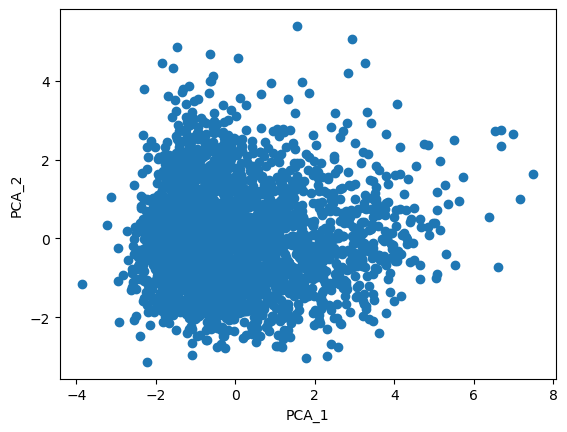

In [20]:
fig, ax = plt.subplots()
ax.scatter(principal_components_df['PCA_1'],principal_components_df['PCA_2'])
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
plt.show()

In [ ]:
# From the previous output, we can see that we will need the first 8 principal components in order to explain 80% of the total data variance. 
# Therefore, in this particular case the use of only two principal components to display the audio features will not be a good strategy as we can only explain 32% of the total data.
# No clear groups in the graph

- UMAP

In [21]:
reducer = UMAP(n_components = 2, random_state = 55)

reducer.fit(num_scaled_df)
X_umap_transformed = reducer.transform(num_scaled_df)

X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2"])
X_umap_transformed_df.head()

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP_1    UMAP_2
0  11.573197  4.039968
1  14.934840  4.716168
2  10.649671  5.291778
3  11.747463  6.284400
4  10.550596  5.000027

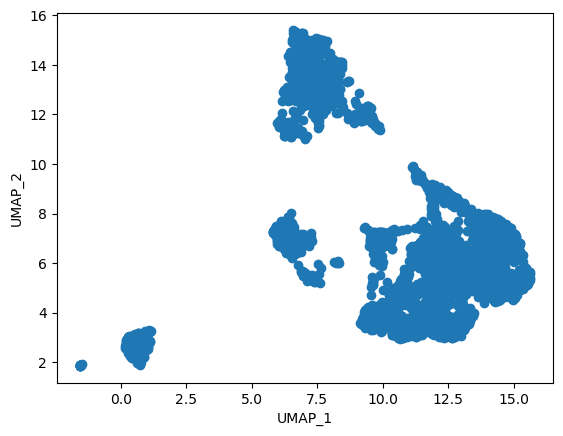

In [22]:
fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df['UMAP_1'],X_umap_transformed_df['UMAP_2'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

In [ ]:
# In this case, we can see some clusters 

- ISOMAP

In [23]:
iso = Isomap(n_neighbors = 12, n_components = 2)

iso.fit(num_scaled_df)
X_isomap_transformed = iso.transform(num_scaled_df)

X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

ISO_1     ISO_2
0 -2.310799  0.780339
1 -2.048797  0.536979
2 -3.147382  1.249947
3 -3.628611 -0.437188
4 -2.406125  1.141277

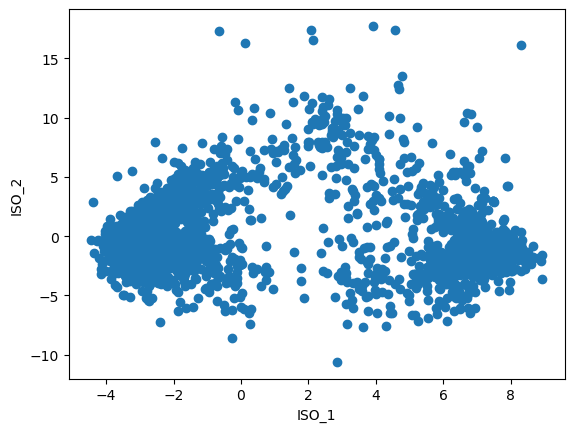

In [24]:
fig, ax = plt.subplots()
ax.scatter(X_isomap_transformed_df['ISO_1'],X_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

In [ ]:
# Also difficult to identify groups, here is also possible to create a function to change the
# number of neighbours and try to find the one that clusters better

- TSNE

In [25]:
tsne = TSNE(n_components=2, learning_rate=100, init='random', perplexity=40, random_state=12)

X_tsne_transformed = tsne.fit_transform(num_scaled_df)
X_tsne_transformed_df = pd.DataFrame(X_tsne_transformed, columns=["TSNE_1","TSNE_2"])
X_tsne_transformed_df.head()

TSNE_1     TSNE_2
0 -25.091654 -21.051701
1 -21.303497  20.372625
2 -11.519874 -35.268833
3 -29.526026 -19.002619
4  -7.115757 -39.108181

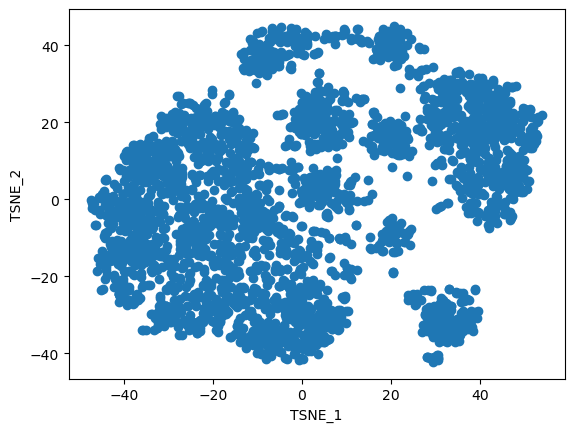

In [26]:
fig, ax = plt.subplots()
ax.scatter(X_tsne_transformed_df['TSNE_1'],X_tsne_transformed_df['TSNE_2'])
ax.set_xlabel("TSNE_1")
ax.set_ylabel("TSNE_2")
plt.show()

In [ ]:
# Also difficult to identify clusters

## Clustering model

Here the UMAP dimentional reduction will be used as the input for the clustering process

- K-Means 

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 48055.37890625.
Iteration 1, inertia 39402.921875.
Iteration 2, inertia 39350.53125.
Converged at iteration 2: center shift 5.91656134929508e-05 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 45368.53515625.
Iteration 1, inertia 39359.78125.
Iteration 2, inertia 39350.484375.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 46247.21484375.
Iteration 1, inertia 36320.234375.
Iteration 2, inertia 36312.75.
Converged at iteration 2: center shift 0.0010632214834913611 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 49114.609375.
Iteration 1, inertia 36350.93359375.
Iteration 2, inertia 36321.17578125.
Iteration 3, inertia 36314.3515625.
Iteration 4, inertia 36311.5625.
Converged at iteration 4: center shift 0.00025634837220422924 within tolerance 0.0013403569221496583.
Initialization com

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 3 clusters! 

Initialization complete
Iteration 0, inertia 30490.19921875.
Iteration 1, inertia 17753.453125.
Iteration 2, inertia 17623.140625.
Iteration 3, inertia 17567.453125.
Iteration 4, inertia 17521.916015625.
Iteration 5, inertia 17476.890625.
Iteration 6, inertia 17439.859375.
Iteration 7, inertia 17428.0078125.
Iteration 8, inertia 17422.849609375.
Converged at iteration 8: center shift 0.001279617310501635 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 25722.427734375.
Iteration 1, inertia 17807.953125.
Iteration 2, inertia 17672.0390625.
Iteration 3, inertia 17584.06640625.
Iteration 4, inertia 17542.46875.
Iteration 5, inertia 17491.51171875.
Iteration 6, inertia 17456.0625.
Iteration 7, inertia 17434.556640625.
Iteration 8, inertia 17425.787109375.
Iteration 9, inertia 17422.365234375.
Converged at iteration 9: center shift 0.0008162911399267614 within tolerance 0.0013403569221496583.
Initialization comp

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 4 clusters! 

Initialization complete
Iteration 0, inertia 13637.720703125.
Iteration 1, inertia 10501.3330078125.
Iteration 2, inertia 10243.365234375.
Iteration 3, inertia 10134.6572265625.
Iteration 4, inertia 10091.158203125.
Iteration 5, inertia 10073.0166015625.
Iteration 6, inertia 10069.060546875.
Converged at iteration 6: center shift 0.0004770274681504816 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 17241.85546875.
Iteration 1, inertia 12172.265625.
Iteration 2, inertia 11946.564453125.
Iteration 3, inertia 11938.501953125.
Converged at iteration 3: center shift 0.0008443018887192011 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 14536.828125.
Iteration 1, inertia 10678.970703125.
Iteration 2, inertia 10474.244140625.
Iteration 3, inertia 10314.6279296875.
Iteration 4, inertia 10228.388671875.
Iteration 5, inertia 10160.6630859375.
Iteration 6, inertia 10097.7119140625.

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 5, inertia 10100.119140625.
Iteration 6, inertia 10076.466796875.
Iteration 7, inertia 10069.91796875.
Converged at iteration 7: center shift 0.001051674596965313 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 13757.84375.
Iteration 1, inertia 11183.3251953125.
Iteration 2, inertia 10573.298828125.
Iteration 3, inertia 10366.078125.
Iteration 4, inertia 10220.1201171875.
Iteration 5, inertia 10131.376953125.
Iteration 6, inertia 10091.4501953125.
Iteration 7, inertia 10073.537109375.
Iteration 8, inertia 10069.060546875.
Converged at iteration 8: center shift 0.0004770274681504816 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 15830.8984375.
Iteration 1, inertia 13641.2333984375.
Iteration 2, inertia 11608.763671875.
Iteration 3, inertia 10579.8994140625.
Iteration 4, inertia 10323.4423828125.
Iteration 5, inertia 10183.927734375.
Iteration 6, inertia 10111.650390625.
Iteration 7, inertia 10083.587890

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 4, inertia 7108.18896484375.
Iteration 5, inertia 6746.2333984375.
Iteration 6, inertia 6648.521484375.
Iteration 7, inertia 6641.23046875.
Iteration 8, inertia 6639.724609375.
Converged at iteration 8: center shift 0.00023105021682567894 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 12612.169921875.
Iteration 1, inertia 10147.796875.
Iteration 2, inertia 9688.783203125.
Iteration 3, inertia 9627.6181640625.
Iteration 4, inertia 9601.037109375.
Iteration 5, inertia 9583.23046875.
Iteration 6, inertia 9552.9609375.
Iteration 7, inertia 9520.3388671875.
Iteration 8, inertia 9497.46484375.
Iteration 9, inertia 9462.4833984375.
Iteration 10, inertia 9414.630859375.
Iteration 11, inertia 9363.205078125.
Iteration 12, inertia 9324.736328125.
Iteration 13, inertia 9235.798828125.
Iteration 14, inertia 9110.58203125.
Iteration 15, inertia 8891.013671875.
Iteration 16, inertia 8589.98046875.
Iteration 17, inertia 8312.763671875.
Iteration 18, ine

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 10, inertia 6002.2978515625.
Iteration 11, inertia 5998.6123046875.
Iteration 12, inertia 5997.4384765625.
Converged at iteration 12: center shift 0.0009778790408745408 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 9680.291015625.
Iteration 1, inertia 6854.306640625.
Iteration 2, inertia 6550.89697265625.
Iteration 3, inertia 6170.6513671875.
Iteration 4, inertia 6061.876953125.
Iteration 5, inertia 6040.837890625.
Iteration 6, inertia 6035.16015625.
Iteration 7, inertia 6031.39892578125.
Iteration 8, inertia 6023.1279296875.
Iteration 9, inertia 6010.1005859375.
Iteration 10, inertia 6002.3154296875.
Iteration 11, inertia 5998.994140625.
Iteration 12, inertia 5997.44921875.
Converged at iteration 12: center shift 0.0009605785016901791 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 7428.88037109375.
Iteration 1, inertia 6156.37158203125.
Iteration 2, inertia 6089.26416015625.
Iteration 3, inertia 607

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 4378.7138671875.
Iteration 2, inertia 4268.388671875.
Iteration 3, inertia 4218.240234375.
Iteration 4, inertia 4191.576171875.
Iteration 5, inertia 4174.158203125.
Iteration 6, inertia 4169.0927734375.
Iteration 7, inertia 4167.205078125.
Iteration 8, inertia 4165.216796875.
Iteration 9, inertia 4164.1474609375.
Converged at iteration 9: center shift 0.0013044360093772411 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 6829.171875.
Iteration 1, inertia 4443.3173828125.
Iteration 2, inertia 4228.59765625.
Iteration 3, inertia 4198.47802734375.
Iteration 4, inertia 4193.34765625.
Iteration 5, inertia 4191.70654296875.
Converged at iteration 5: center shift 0.0010961260413751006 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 7856.4501953125.
Iteration 1, inertia 5612.4453125.
Iteration 2, inertia 5103.1826171875.
Iteration 3, inertia 4586.4208984375.
Iteration 4, inertia 4379.3564453125.
Itera

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 4, inertia 3708.71240234375.
Iteration 5, inertia 3704.580078125.
Iteration 6, inertia 3698.8076171875.
Iteration 7, inertia 3689.33642578125.
Iteration 8, inertia 3677.0595703125.
Iteration 9, inertia 3669.24267578125.
Iteration 10, inertia 3663.93359375.
Iteration 11, inertia 3659.610595703125.
Iteration 12, inertia 3656.779052734375.
Iteration 13, inertia 3654.877197265625.
Iteration 14, inertia 3653.8037109375.
Converged at iteration 14: center shift 0.0007038603653199971 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 4865.91015625.
Iteration 1, inertia 4145.77294921875.
Iteration 2, inertia 4078.16162109375.
Iteration 3, inertia 4036.863525390625.
Iteration 4, inertia 3995.2294921875.
Iteration 5, inertia 3961.44482421875.
Iteration 6, inertia 3946.54833984375.
Iteration 7, inertia 3936.8876953125.
Iteration 8, inertia 3924.9033203125.
Iteration 9, inertia 3886.07177734375.
Iteration 10, inertia 3805.259765625.
Iteration 11, inertia 

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 4113.4892578125.
Iteration 1, inertia 3297.269775390625.
Iteration 2, inertia 3249.78955078125.
Iteration 3, inertia 3237.6376953125.
Iteration 4, inertia 3232.28759765625.
Iteration 5, inertia 3227.6376953125.
Iteration 6, inertia 3221.25830078125.
Iteration 7, inertia 3209.547607421875.
Iteration 8, inertia 3181.73046875.
Iteration 9, inertia 3093.8017578125.
Iteration 10, inertia 3022.49853515625.
Iteration 11, inertia 3009.24267578125.
Iteration 12, inertia 3005.218994140625.
Iteration 13, inertia 3002.958740234375.
Iteration 14, inertia 3001.72216796875.
Converged at iteration 14: center shift 0.0008635009289719164 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 3962.546875.
Iteration 1, inertia 3377.99951171875.
Iteration 2, inertia 3318.931640625.
Iteration 3, inertia 3306.16943359375.
Iteration 4, inertia 3299.48828125.
Iteration 5, inertia 3293.245849609375.
Iteration 6, inertia 3289.62060546875.
Iteration 7, inertia 32

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 5, inertia 2820.6669921875.
Iteration 6, inertia 2813.61865234375.
Iteration 7, inertia 2808.472900390625.
Iteration 8, inertia 2791.375.
Iteration 9, inertia 2710.322509765625.
Iteration 10, inertia 2643.96533203125.
Iteration 11, inertia 2634.38671875.
Iteration 12, inertia 2632.625244140625.
Iteration 13, inertia 2631.98046875.
Converged at iteration 13: center shift 0.0007905709207989275 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 3909.41748046875.
Iteration 1, inertia 2860.1591796875.
Iteration 2, inertia 2728.087890625.
Iteration 3, inertia 2681.71875.
Iteration 4, inertia 2657.2412109375.
Iteration 5, inertia 2645.013427734375.
Iteration 6, inertia 2639.22265625.
Iteration 7, inertia 2635.314208984375.
Iteration 8, inertia 2631.44677734375.
Iteration 9, inertia 2621.96337890625.
Iteration 10, inertia 2616.857421875.
Iteration 11, inertia 2615.09326171875.
Iteration 12, inertia 2612.8046875.
Iteration 13, inertia 2611.4462890625.

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3046.638427734375.
Iteration 1, inertia 2498.77392578125.
Iteration 2, inertia 2428.93798828125.
Iteration 3, inertia 2378.20947265625.
Iteration 4, inertia 2338.773193359375.
Iteration 5, inertia 2315.544921875.
Iteration 6, inertia 2304.615234375.
Iteration 7, inertia 2295.86376953125.
Iteration 8, inertia 2290.9716796875.
Iteration 9, inertia 2288.62109375.
Iteration 10, inertia 2287.9306640625.
Iteration 11, inertia 2287.146484375.
Iteration 12, inertia 2286.401123046875.
Converged at iteration 12: center shift 0.0012961495667696 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 2995.53125.
Iteration 1, inertia 2527.046142578125.
Iteration 2, inertia 2467.85693359375.
Iteration 3, inertia 2451.053466796875.
Iteration 4, inertia 2446.4140625.
Iteration 5, inertia 2444.6943359375.
Iteration 6, inertia 2443.453125.
Iteration 7, inertia 2441.1328125.
Iteration 8, inertia 2425.573974609375.
Iteration 9, inertia 2345.4619140625.
Ite

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 7, inertia 1932.2716064453125.
Iteration 8, inertia 1926.939208984375.
Iteration 9, inertia 1923.729736328125.
Iteration 10, inertia 1922.30810546875.
Iteration 11, inertia 1921.730712890625.
Converged at iteration 11: center shift 0.0007752731326036155 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 2715.1669921875.
Iteration 1, inertia 2165.55224609375.
Iteration 2, inertia 2136.89599609375.
Iteration 3, inertia 2126.240966796875.
Iteration 4, inertia 2121.1640625.
Iteration 5, inertia 2119.47705078125.
Iteration 6, inertia 2118.98388671875.
Converged at iteration 6: center shift 0.0005844200495630503 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 3247.416015625.
Iteration 1, inertia 2447.4892578125.
Iteration 2, inertia 2396.671142578125.
Iteration 3, inertia 2325.451416015625.
Iteration 4, inertia 2196.35302734375.
Iteration 5, inertia 2155.821533203125.
Iteration 6, inertia 2139.54296875.
Iteratio

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2479.180908203125.
Iteration 1, inertia 1956.039794921875.
Iteration 2, inertia 1868.7486572265625.
Iteration 3, inertia 1817.706298828125.
Iteration 4, inertia 1787.1904296875.
Iteration 5, inertia 1777.3447265625.
Iteration 6, inertia 1771.899169921875.
Iteration 7, inertia 1765.9293212890625.
Iteration 8, inertia 1762.548828125.
Iteration 9, inertia 1761.119873046875.
Converged at iteration 9: center shift 0.0010649746982380748 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 2654.51220703125.
Iteration 1, inertia 2232.8671875.
Iteration 2, inertia 2137.24560546875.
Iteration 3, inertia 2090.588134765625.
Iteration 4, inertia 2069.14599609375.
Iteration 5, inertia 2060.009765625.
Iteration 6, inertia 2056.126708984375.
Iteration 7, inertia 2052.904296875.
Iteration 8, inertia 2052.15771484375.
Iteration 9, inertia 2051.64599609375.
Converged at iteration 9: center shift 0.0009627332910895348 within tolerance 0.0013403569221496

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2317.8896484375.
Iteration 1, inertia 1803.78125.
Iteration 2, inertia 1720.989013671875.
Iteration 3, inertia 1679.3070068359375.
Iteration 4, inertia 1656.68603515625.
Iteration 5, inertia 1647.92236328125.
Iteration 6, inertia 1638.6171875.
Iteration 7, inertia 1627.7239990234375.
Iteration 8, inertia 1618.918701171875.
Iteration 9, inertia 1607.673583984375.
Iteration 10, inertia 1598.4241943359375.
Iteration 11, inertia 1596.7099609375.
Iteration 12, inertia 1596.3543701171875.
Converged at iteration 12: center shift 0.0004923174856230617 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 2381.74462890625.
Iteration 1, inertia 1873.318603515625.
Iteration 2, inertia 1780.545654296875.
Iteration 3, inertia 1749.6873779296875.
Iteration 4, inertia 1737.7685546875.
Iteration 5, inertia 1727.58837890625.
Iteration 6, inertia 1715.228515625.
Iteration 7, inertia 1705.8336181640625.
Iteration 8, inertia 1699.770263671875.
Iteration 

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 9, inertia 1485.0377197265625.
Iteration 10, inertia 1474.38720703125.
Iteration 11, inertia 1472.06884765625.
Iteration 12, inertia 1471.56787109375.
Converged at iteration 12: center shift 0.0007296798285096884 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 2185.187744140625.
Iteration 1, inertia 1708.70458984375.
Iteration 2, inertia 1599.702392578125.
Iteration 3, inertia 1546.44091796875.
Iteration 4, inertia 1530.095458984375.
Iteration 5, inertia 1521.142822265625.
Iteration 6, inertia 1515.2296142578125.
Iteration 7, inertia 1512.810302734375.
Iteration 8, inertia 1511.1827392578125.
Iteration 9, inertia 1510.521484375.
Iteration 10, inertia 1509.8951416015625.
Iteration 11, inertia 1509.10693359375.
Iteration 12, inertia 1507.90576171875.
Iteration 13, inertia 1506.54150390625.
Iteration 14, inertia 1505.288330078125.
Iteration 15, inertia 1504.0421142578125.
Iteration 16, inertia 1502.82958984375.
Iteration 17, inertia 1501.3972

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 1371.4984130859375.
Iteration 3, inertia 1364.4769287109375.
Iteration 4, inertia 1360.735107421875.
Iteration 5, inertia 1359.010498046875.
Iteration 6, inertia 1357.761962890625.
Iteration 7, inertia 1356.13134765625.
Iteration 8, inertia 1354.436767578125.
Iteration 9, inertia 1353.34619140625.
Iteration 10, inertia 1351.931884765625.
Iteration 11, inertia 1351.32763671875.
Converged at iteration 11: center shift 0.0004884336958639324 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 2098.620849609375.
Iteration 1, inertia 1541.48388671875.
Iteration 2, inertia 1462.088134765625.
Iteration 3, inertia 1414.6650390625.
Iteration 4, inertia 1396.066650390625.
Iteration 5, inertia 1388.589599609375.
Iteration 6, inertia 1384.91162109375.
Iteration 7, inertia 1381.645263671875.
Iteration 8, inertia 1378.4744873046875.
Iteration 9, inertia 1377.584228515625.
Converged at iteration 9: center shift 0.0008024778217077255 within toleranc

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 1688.208740234375.
Iteration 1, inertia 1254.99951171875.
Iteration 2, inertia 1236.70947265625.
Iteration 3, inertia 1229.44091796875.
Iteration 4, inertia 1225.890869140625.
Iteration 5, inertia 1224.187255859375.
Iteration 6, inertia 1222.9027099609375.
Iteration 7, inertia 1221.272216796875.
Iteration 8, inertia 1219.5777587890625.
Iteration 9, inertia 1218.48681640625.
Iteration 10, inertia 1217.0726318359375.
Iteration 11, inertia 1216.468505859375.
Converged at iteration 11: center shift 0.0004884297959506512 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 1800.9202880859375.
Iteration 1, inertia 1448.54638671875.
Iteration 2, inertia 1395.3297119140625.
Iteration 3, inertia 1362.06640625.
Iteration 4, inertia 1347.6971435546875.
Iteration 5, inertia 1340.140625.
Iteration 6, inertia 1330.693115234375.
Iteration 7, inertia 1307.847900390625.
Iteration 8, inertia 1300.737060546875.
Iteration 9, inertia 1297.6854248046875.


/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 1586.44775390625.
Iteration 1, inertia 1242.20654296875.
Iteration 2, inertia 1215.177978515625.
Iteration 3, inertia 1201.500732421875.
Iteration 4, inertia 1192.1661376953125.
Iteration 5, inertia 1183.47802734375.
Iteration 6, inertia 1169.0765380859375.
Iteration 7, inertia 1147.693115234375.
Iteration 8, inertia 1143.1575927734375.
Iteration 9, inertia 1141.349853515625.
Iteration 10, inertia 1140.631591796875.
Iteration 11, inertia 1140.04931640625.
Iteration 12, inertia 1139.57470703125.
Converged at iteration 12: center shift 0.0009405543678440154 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 1604.211669921875.
Iteration 1, inertia 1245.4649658203125.
Iteration 2, inertia 1198.1912841796875.
Iteration 3, inertia 1176.6746826171875.
Iteration 4, inertia 1163.95751953125.
Iteration 5, inertia 1160.08935546875.
Iteration 6, inertia 1158.322265625.
Iteration 7, inertia 1156.7552490234375.
Iteration 8, inertia 1155.81396484

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 1442.4287109375.
Iteration 1, inertia 1139.0400390625.
Iteration 2, inertia 1121.46533203125.
Iteration 3, inertia 1111.7972412109375.
Iteration 4, inertia 1104.892822265625.
Iteration 5, inertia 1101.030517578125.
Iteration 6, inertia 1098.59033203125.
Iteration 7, inertia 1097.2686767578125.
Iteration 8, inertia 1096.1827392578125.
Iteration 9, inertia 1095.4521484375.
Iteration 10, inertia 1095.042724609375.
Converged at iteration 10: center shift 0.0007319825235754251 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 1439.816650390625.
Iteration 1, inertia 1162.1929931640625.
Iteration 2, inertia 1125.310302734375.
Iteration 3, inertia 1113.880126953125.
Iteration 4, inertia 1106.333740234375.
Iteration 5, inertia 1095.915771484375.
Iteration 6, inertia 1092.892822265625.
Iteration 7, inertia 1091.73828125.
Iteration 8, inertia 1090.8740234375.
Iteration 9, inertia 1090.432373046875.
Iteration 10, inertia 1089.88134765625.
Ite

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 3, inertia 1025.5926513671875.
Iteration 4, inertia 1016.7974853515625.
Iteration 5, inertia 1007.4376220703125.
Iteration 6, inertia 1000.021484375.
Iteration 7, inertia 995.3477783203125.
Iteration 8, inertia 992.7382202148438.
Iteration 9, inertia 991.3444213867188.
Iteration 10, inertia 990.9483642578125.
Converged at iteration 10: center shift 0.0011655690614134073 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 1408.74560546875.
Iteration 1, inertia 1082.946533203125.
Iteration 2, inertia 1024.1748046875.
Iteration 3, inertia 1000.96826171875.
Iteration 4, inertia 992.0357666015625.
Iteration 5, inertia 990.0125732421875.
Iteration 6, inertia 989.2330322265625.
Iteration 7, inertia 988.5595703125.
Converged at iteration 7: center shift 0.0011876380303874612 within tolerance 0.0013403569221496583.
Initialization complete
Iteration 0, inertia 1461.609375.
Iteration 1, inertia 1129.08154296875.
Iteration 2, inertia 1062.251953125.
Itera

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

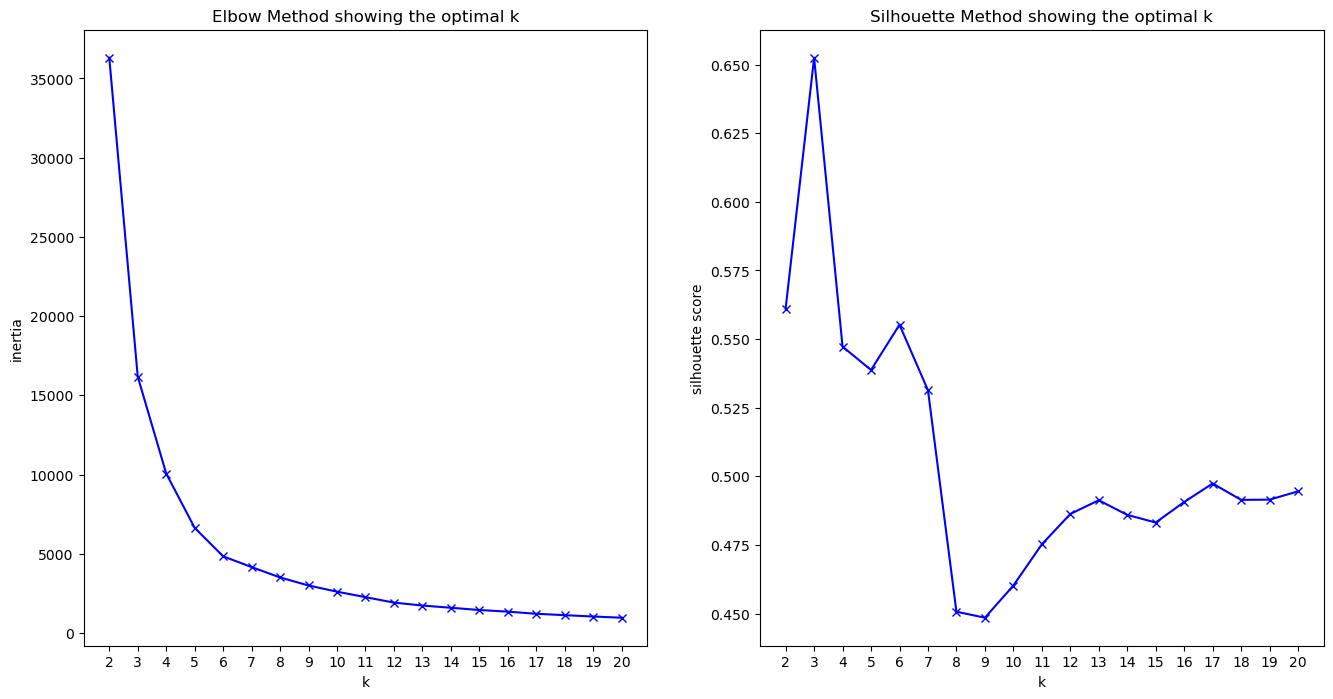

In [27]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters = k,
                    random_state = 100,
                    verbose = 1)
    
    kmeans.fit(X_umap_transformed_df)

    filename = "kmeans_" + str(k) + ".pickle" 
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_umap_transformed_df, kmeans.predict(X_umap_transformed_df)))



%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [ ]:
# Above you can see that the optimal number of clusters is 3

In [28]:
kmeans = KMeans(n_clusters = 3, random_state = 100)

kmeans.fit(X_umap_transformed_df)

/Users/vschuckar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=100)

In [29]:
k_clusters = kmeans.predict(X_umap_transformed_df)

pd.Series(k_clusters).value_counts().sort_index()

0    1753
1     711
2     387
Name: count, dtype: int64

In [30]:
X_umap_transformed_df['k_means_clusters'] = k_clusters
X_umap_transformed_df.head()

UMAP_1    UMAP_2  k_means_clusters
0  11.573197  4.039968                 0
1  14.934840  4.716168                 0
2  10.649671  5.291778                 0
3  11.747463  6.284400                 0
4  10.550596  5.000027                 0

In [31]:
merged_songs['k_means_clusters'] = k_clusters

In [32]:
merged_songs.head()

title        artist                      id  \
0  Rockin' Around The Christmas Tree    Brenda Lee  2EjXfH91m7f8HiJN1yQg97   
1    All I Want For Christmas Is You  Mariah Carey  0bYg9bo50gSsH3LtXe2SQn   
2                   Jingle Bell Rock   Bobby Helms  7vQbuQcyTflfCIOu3Uzzya   
3                     Last Christmas         Wham!  2FRnf9qhLbvw8fu4IBXx78   
4            A Holly Jolly Christmas     Burl Ives  77khP2fIVhSW23NwxrRluh   

   danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
0         0.589   0.472    8    -8.749     1       0.0502         0.614  ...   
1         0.336   0.627    7    -7.463     1       0.0384         0.164  ...   
2         0.754   0.424    2    -8.463     1       0.0363         0.643  ...   
3         0.735   0.478    2   -12.472     1       0.0293         0.189  ...   
4         0.683   0.375    0   -13.056     1       0.0303         0.579  ...   

   valence    tempo            type                                   uri  \
0    0.898   67.196  audio_features  spotify:track:2EjXfH91m7f8HiJN1yQg97   
1    0.350  150.273  audio_features  spotify:track:0bYg9bo50gSsH3LtXe2SQn   
2    0.806  119.705  audio_features  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
3    0.947  107.682  audio_features  spotify:track:2FRnf9qhLbvw8fu4IBXx78   
4    0.888  140.467  audio_features  spotify:track:77khP2fIVhSW23NwxrRluh   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2EjXfH91m7f8...   
1  https://api.spotify.com/v1/tracks/0bYg9bo50gSs...   
2  https://api.spotify.com/v1/tracks/7vQbuQcyTflf...   
3  https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...   
4  https://api.spotify.com/v1/tracks/77khP2fIVhSW...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2EjX...      126267   
1  https://api.spotify.com/v1/audio-analysis/0bYg...      241107   
2  https://api.spotify.com/v1/audio-analysis/7vQb...      130973   
3  https://api.spotify.com/v1/audio-analysis/2FRn...      262960   
4  https://api.spotify.com/v1/audio-analysis/77kh...      135533   

  time_signature  dataset  k_means_clusters  
0              4      Hot                 0  
1              4      Hot                 0  
2              4      Hot                 0  
3              4      Hot                 0  
4              4      Hot                 0  

[5 rows x 22 columns]

In [33]:
k_clusters = np.unique(k_clusters)
k_clusters

array([0, 1, 2], dtype=int32)

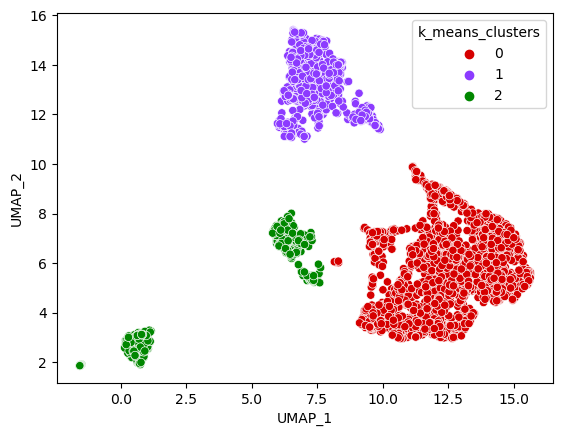

In [35]:
custom_palette = sns.color_palette(cc.glasbey, n_colors = k_clusters.size)
sns.scatterplot(X_umap_transformed_df, x = "UMAP_1", y = "UMAP_2", hue = "k_means_clusters", palette = custom_palette);
plt.show()

- DBSCAN

In [36]:
model = DBSCAN(min_samples = 4) # min_samples = 2 * n_components 
db_model = model.fit_predict(X_umap_transformed_df) 

In [37]:
merged_songs['db_clusters'] = db_model
merged_songs.head()

title        artist                      id  \
0  Rockin' Around The Christmas Tree    Brenda Lee  2EjXfH91m7f8HiJN1yQg97   
1    All I Want For Christmas Is You  Mariah Carey  0bYg9bo50gSsH3LtXe2SQn   
2                   Jingle Bell Rock   Bobby Helms  7vQbuQcyTflfCIOu3Uzzya   
3                     Last Christmas         Wham!  2FRnf9qhLbvw8fu4IBXx78   
4            A Holly Jolly Christmas     Burl Ives  77khP2fIVhSW23NwxrRluh   

   danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
0         0.589   0.472    8    -8.749     1       0.0502         0.614  ...   
1         0.336   0.627    7    -7.463     1       0.0384         0.164  ...   
2         0.754   0.424    2    -8.463     1       0.0363         0.643  ...   
3         0.735   0.478    2   -12.472     1       0.0293         0.189  ...   
4         0.683   0.375    0   -13.056     1       0.0303         0.579  ...   

     tempo            type                                   uri  \
0   67.196  audio_features  spotify:track:2EjXfH91m7f8HiJN1yQg97   
1  150.273  audio_features  spotify:track:0bYg9bo50gSsH3LtXe2SQn   
2  119.705  audio_features  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
3  107.682  audio_features  spotify:track:2FRnf9qhLbvw8fu4IBXx78   
4  140.467  audio_features  spotify:track:77khP2fIVhSW23NwxrRluh   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2EjXfH91m7f8...   
1  https://api.spotify.com/v1/tracks/0bYg9bo50gSs...   
2  https://api.spotify.com/v1/tracks/7vQbuQcyTflf...   
3  https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...   
4  https://api.spotify.com/v1/tracks/77khP2fIVhSW...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2EjX...      126267   
1  https://api.spotify.com/v1/audio-analysis/0bYg...      241107   
2  https://api.spotify.com/v1/audio-analysis/7vQb...      130973   
3  https://api.spotify.com/v1/audio-analysis/2FRn...      262960   
4  https://api.spotify.com/v1/audio-analysis/77kh...      135533   

  time_signature dataset  k_means_clusters  db_clusters  
0              4     Hot                 0            0  
1              4     Hot                 0            0  
2              4     Hot                 0            0  
3              4     Hot                 0            0  
4              4     Hot                 0            0  

[5 rows x 23 columns]

In [38]:
X_umap_transformed_df['db_clusters'] = db_model
X_umap_transformed_df.head()

UMAP_1    UMAP_2  k_means_clusters  db_clusters
0  11.573197  4.039968                 0            0
1  14.934840  4.716168                 0            0
2  10.649671  5.291778                 0            0
3  11.747463  6.284400                 0            0
4  10.550596  5.000027                 0            0

In [39]:
clusters_db = np.unique(db_model)
clusters_db

array([0, 1, 2, 3, 4, 5])

In [44]:
dbcv_score = round(DBCV(X_umap_transformed_df.iloc[:,:2].to_numpy(), db_model, dist_function=euclidean))
print("The DBCV score is {:.2f}".format(dbcv_score))

The DBCV score is 1.00


In [ ]:
# With Episilon = 0.5 (default)
# min_samples = 4
# And DBCV score is 1.00

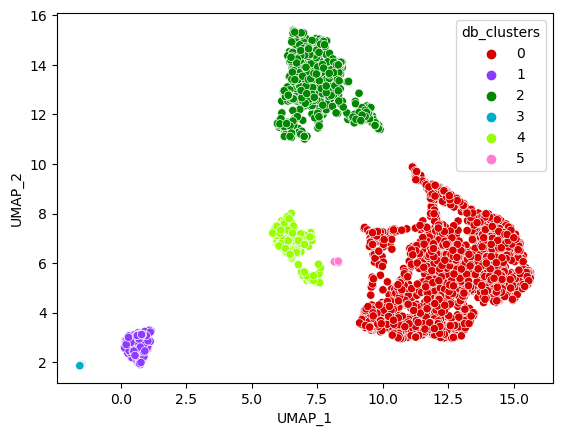

In [40]:
custom_palette = sns.color_palette(cc.glasbey, n_colors = clusters_db.size)
sns.scatterplot(X_umap_transformed_df, x = "UMAP_1", y = "UMAP_2", hue = "db_clusters", palette = custom_palette);
plt.show()

In [41]:
neighbors = 4 

nbrs = NearestNeighbors(n_neighbors=neighbors).fit(X_umap_transformed_df)
distances, indices = nbrs.kneighbors(X_umap_transformed_df)
print("The 'distances' array is an 2D-array containing as many rows as points and as many columns as mins_samples", distances.shape)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
fig = px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc).update_layout(
    xaxis_title="Array index", yaxis_title="Distance"
)
fig.add_hline(y=0.5, annotation_text="Default value of epsilon in DBSCAN")
fig.show()

The 'distances' array is an 2D-array containing as many rows as points and as many columns as mins_samples (2851, 4)


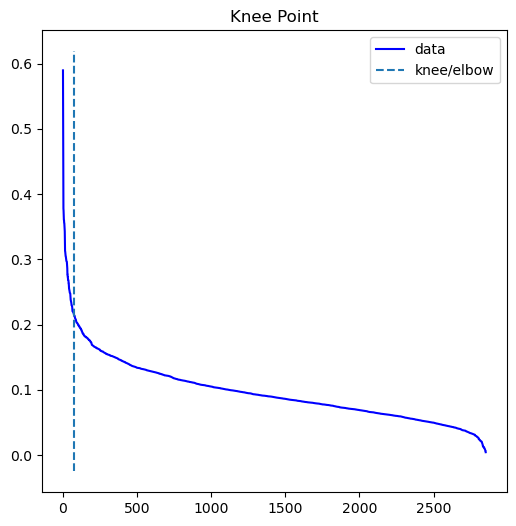

In [42]:
kneedle = KneeLocator(range(1,len(distance_desc)+1),  
                      distance_desc, 
                      S=1.0, 
                      curve="convex", 
                      direction="decreasing") 
kneedle.plot_knee()

In [43]:
print("The epsilon value for which the distance plot has the biggest change in the slope is: {:.2f}".format(kneedle.knee_y))

The epsilon value for which the distance plot has the biggest change in the slope is: 0.21


In [45]:
models = {}
epsilons = []
silhouettes = []
dbcvs = []


for value in np.arange(0.10, 0.65, 0.01):
    epsilons.append(value)
    print("Clustering with epsilon {:.2f}".format(value))
    model = DBSCAN(eps=value, min_samples=4) 
    # fit model and predict clusters
    yhat = model.fit_predict(X_umap_transformed_df.iloc[:,:2])
    X_umap_transformed_df["dbscan_"+str(round(value,2))] = yhat

    # Scores
    print("======================================================")
    #print("Evaluating the clustering with the silhoette score...")
    print()
    sil_score =  round(silhouette_score(X_umap_transformed_df.iloc[:,:2], yhat, metric='euclidean'),2)
    print("The silhouette score is {:.2f}".format(sil_score))
    silhouettes.append(sil_score)
    #print("Evaluating the clustering with the DBVC score...")
    #start_time = time.time()
    try:
        dbcv_score = round(DBCV(X_umap_transformed_df.iloc[:,:2].to_numpy(), yhat, dist_function=euclidean))
        print("The DBCV score is {:.2f}".format(dbcv_score))
        dbcvs.append(dbcv_score)
    except:
        print("The DBCV score calculation failed")
        dbcvs.append(np.nan)
    print("======================================================")
    #ending_time = time.time()
    #print("The clustering evaluation with the DBCV score took {:.2f} seconds".format(ending_time-start_time))
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "silhouette_score": sil_score,
                                            "DBCV_score": dbcv_score}
    print()
    print()



Clustering with epsilon 0.10

The silhouette score is 0.10
The DBCV score is 0.00


Clustering with epsilon 0.11

The silhouette score is 0.11
The DBCV score is 0.00


Clustering with epsilon 0.12

The silhouette score is 0.07


/Users/vschuckar/Desktop/data_analytics/Week_6/Day_3/Afternoon/lab-clustering-songs/dbcv.py:53: RuntimeWarning:

divide by zero encountered in scalar power

/Users/vschuckar/Desktop/data_analytics/Week_6/Day_3/Afternoon/lab-clustering-songs/dbcv.py:198: RuntimeWarning:

invalid value encountered in scalar divide



The DBCV score calculation failed


Clustering with epsilon 0.13

The silhouette score is 0.06
The DBCV score is 0.00


Clustering with epsilon 0.14

The silhouette score is 0.02
The DBCV score is 0.00


Clustering with epsilon 0.15

The silhouette score is -0.08
The DBCV score is 0.00


Clustering with epsilon 0.16

The silhouette score is -0.04
The DBCV score is 0.00


Clustering with epsilon 0.17

The silhouette score is -0.07
The DBCV score is 0.00


Clustering with epsilon 0.18

The silhouette score is -0.01
The DBCV score is 0.00


Clustering with epsilon 0.19

The silhouette score is -0.03
The DBCV score is 0.00


Clustering with epsilon 0.20

The silhouette score is -0.03
The DBCV score is 0.00


Clustering with epsilon 0.21

The silhouette score is 0.08
The DBCV score is 0.00


Clustering with epsilon 0.22

The silhouette score is 0.20
The DBCV score is 0.00


Clustering with epsilon 0.23

The silhouette score is 0.20
The DBCV score is 0.00


Clustering with epsilon 0.24

The 

/Users/vschuckar/Desktop/data_analytics/Week_6/Day_3/Afternoon/lab-clustering-songs/dbcv.py:53: RuntimeWarning:

divide by zero encountered in scalar power

/Users/vschuckar/Desktop/data_analytics/Week_6/Day_3/Afternoon/lab-clustering-songs/dbcv.py:198: RuntimeWarning:

invalid value encountered in scalar divide



The DBCV score calculation failed


Clustering with epsilon 0.37

The silhouette score is 0.42


/Users/vschuckar/Desktop/data_analytics/Week_6/Day_3/Afternoon/lab-clustering-songs/dbcv.py:53: RuntimeWarning:

divide by zero encountered in scalar power

/Users/vschuckar/Desktop/data_analytics/Week_6/Day_3/Afternoon/lab-clustering-songs/dbcv.py:198: RuntimeWarning:

invalid value encountered in scalar divide



The DBCV score calculation failed


Clustering with epsilon 0.38

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.39

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.40

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.41

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.42

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.43

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.44

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.45

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.46

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.47

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.48

The silhouette score is 0.44
The DBCV score is 1.00


Clustering with epsilon 0.49

The silhou

/tmp/ipykernel_20870/2726861751.py:18: UserWarning:

The palette list has more values (177) than needed (6), which may not be intended.

/tmp/ipykernel_20870/2726861751.py:18: UserWarning:


The palette list has fewer values (136) than needed (177) and will cycle, which may produce an uninterpretable plot.

/tmp/ipykernel_20870/2726861751.py:18: UserWarning:


The palette list has fewer values (115) than needed (136) and will cycle, which may produce an uninterpretable plot.

/tmp/ipykernel_20870/2726861751.py:18: UserWarning:


The palette list has fewer values (91) than needed (115) and will cycle, which may produce an uninterpretable plot.

/tmp/ipykernel_20870/2726861751.py:18: UserWarning:


The palette list has fewer values (74) than needed (91) and will cycle, which may produce an uninterpretable plot.

/tmp/ipykernel_20870/2726861751.py:18: UserWarning:


The palette list has fewer values (54) than needed (74) and will cycle, which may produce an uninterpretable plot.

/tmp/ipy

IndexError: index 18 is out of bounds for axis 0 with size 18

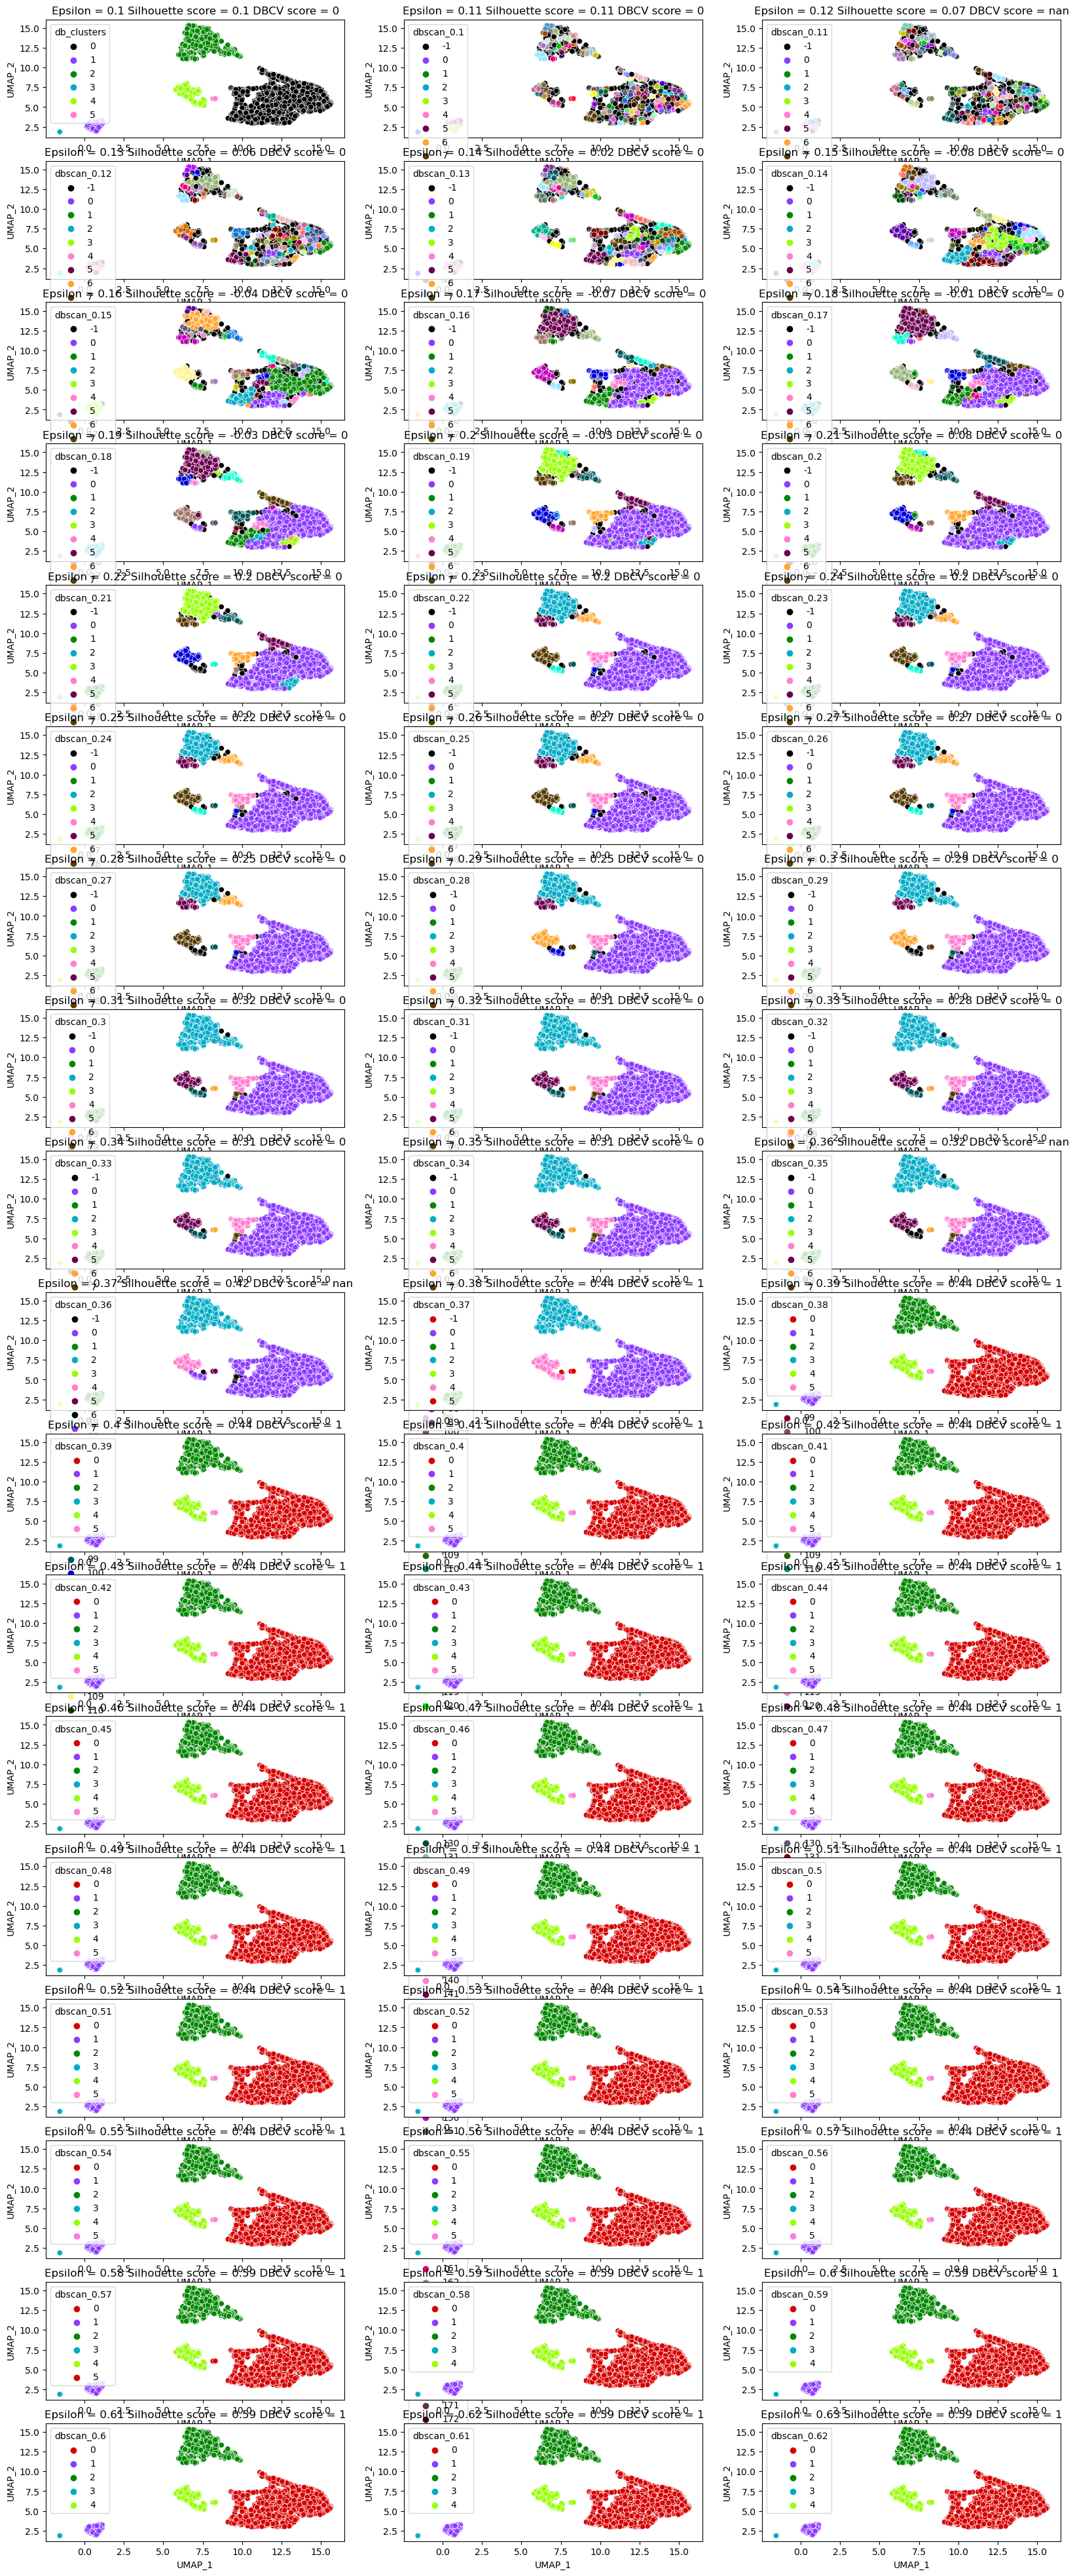

In [47]:
n_rows = int(len(list(models.keys()))/3)

fig, ax = plt.subplots(n_rows,3, figsize=(20,50))
for index, key in enumerate(list(models.keys())):
    row_index = int(np.modf(index/3)[1])
    if ( round(np.modf(index/3)[0],1) == 0 ):
        col_index = 0
    elif ( round(np.modf(index/3)[0],1) == 0.3 ):
        col_index = 1
    else:
        col_index = 2
    epsilon = key.split("_")[1]
    unique_clusters = np.unique(models[key]['yhat']).tolist()
    number_of_unique_clusters = len(unique_clusters)
    custom_palette = sns.color_palette(cc.glasbey, n_colors=number_of_unique_clusters)
    custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(unique_clusters,custom_palette)]
    label = "dbscan_" + epsilon
    sns.scatterplot(X_umap_transformed_df.iloc[:,[0,1,index+3]], x = "UMAP_1", y = "UMAP_2", hue=X_umap_transformed_df.columns[index+3],
                    palette=custom_palette, ax=ax[row_index, col_index])
    ax[row_index, col_index].set_title("Epsilon = "+epsilon+" Silhouette score = "+str(silhouettes[index])+
                                       " DBCV score = "+str(dbcvs[index]))

plt.tight_layout()
plt.show()

In [ ]:
# Even with all the errors above, it is possible anyway to see that the best episilon is 0.39 - even if the 0.38 already 
# gave a DBCV score of 1, it still has -1 outliers. And the max Silhouette score was 0.44. This also shows how the 
# kneedle and silhouette cannot be trusted with this type of clustering method. 

In [58]:
X_umap_transformed_df.head()

UMAP_1    UMAP_2  k_means_clusters  db_clusters  dbscan_0.1  \
0  11.573197  4.039968                 0            0           0   
1  14.934840  4.716168                 0            0         103   
2  10.649671  5.291778                 0            0           1   
3  11.747463  6.284400                 0            0           2   
4  10.550596  5.000027                 0            0           1   

   dbscan_0.11  dbscan_0.12  dbscan_0.13  dbscan_0.14  dbscan_0.15  ...  \
0            0            0            0            0            0  ...   
1            1            1            1            1            1  ...   
2            2            2            2            2            2  ...   
3            3            3            3            3            1  ...   
4            2            2            2            2            2  ...   

   dbscan_0.56  dbscan_0.57  dbscan_0.58  dbscan_0.59  dbscan_0.6  \
0            0            0            0            0           0   
1            0            0            0            0           0   
2            0            0            0            0           0   
3            0            0            0            0           0   
4            0            0            0            0           0   

   dbscan_0.61  dbscan_0.62  dbscan_0.63  dbscan_0.64  hdbscan_clusters  
0            0            0            0            0               181  
1            0            0            0            0                76  
2            0            0            0            0               175  
3            0            0            0            0               174  
4            0            0            0            0               175  

[5 rows x 60 columns]

In [59]:
merged_songs['db_clusters_0.39'] = X_umap_transformed_df['dbscan_0.38']

In [60]:
merged_songs.head()

title        artist                      id  \
0  Rockin' Around The Christmas Tree    Brenda Lee  2EjXfH91m7f8HiJN1yQg97   
1    All I Want For Christmas Is You  Mariah Carey  0bYg9bo50gSsH3LtXe2SQn   
2                   Jingle Bell Rock   Bobby Helms  7vQbuQcyTflfCIOu3Uzzya   
3                     Last Christmas         Wham!  2FRnf9qhLbvw8fu4IBXx78   
4            A Holly Jolly Christmas     Burl Ives  77khP2fIVhSW23NwxrRluh   

   danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
0         0.589   0.472    8    -8.749     1       0.0502         0.614  ...   
1         0.336   0.627    7    -7.463     1       0.0384         0.164  ...   
2         0.754   0.424    2    -8.463     1       0.0363         0.643  ...   
3         0.735   0.478    2   -12.472     1       0.0293         0.189  ...   
4         0.683   0.375    0   -13.056     1       0.0303         0.579  ...   

             type                                   uri  \
0  audio_features  spotify:track:2EjXfH91m7f8HiJN1yQg97   
1  audio_features  spotify:track:0bYg9bo50gSsH3LtXe2SQn   
2  audio_features  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
3  audio_features  spotify:track:2FRnf9qhLbvw8fu4IBXx78   
4  audio_features  spotify:track:77khP2fIVhSW23NwxrRluh   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2EjXfH91m7f8...   
1  https://api.spotify.com/v1/tracks/0bYg9bo50gSs...   
2  https://api.spotify.com/v1/tracks/7vQbuQcyTflf...   
3  https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...   
4  https://api.spotify.com/v1/tracks/77khP2fIVhSW...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2EjX...      126267   
1  https://api.spotify.com/v1/audio-analysis/0bYg...      241107   
2  https://api.spotify.com/v1/audio-analysis/7vQb...      130973   
3  https://api.spotify.com/v1/audio-analysis/2FRn...      262960   
4  https://api.spotify.com/v1/audio-analysis/77kh...      135533   

  time_signature dataset k_means_clusters  db_clusters  db_clusters_0.39  
0              4     Hot                0            0                 0  
1              4     Hot                0            0                 0  
2              4     Hot                0            0                 0  
3              4     Hot                0            0                 0  
4              4     Hot                0            0                 0  

[5 rows x 24 columns]